In [79]:
!pip install plotly

1. Градиентный спуск и его модификации
   - Выбрать [тестовые функции оптимизации](https://ru.wikipedia.org/wiki/Тестовые_функции_для_оптимизации) (2 шт)
   - Запрограммировать собственную реализацию классического градиентного спуска
   - Запрограммировать пайлайн тестирования алгоритма оптимизации
     - Визуализации функции и точки оптимума
     - Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
     - Визуализации точки найденного решения (можно добавить анимацию на плюс балл)
   - Запрограммировать метод вычисления градиента
     - Передача функции градиента от пользователя
     - Символьное вычисление градиента (например с помощью [sympy](https://www.sympy.org/en/index.html)) (на доп балл)
     - Численная аппроксимация градиента (на доп балл)
   - Запрограммировать одну моментную модификацию и протестировать ее
   - Запрограммировать одну адаптивную модификацию и протестировать ее
   - Запрограммировать метод эфолюции темпа обучения и/или метод выбора начального приближения и протестировать их.

## Выбранные функции
-     Функции Бута:
f = $ \left(2 x y - 7\right)^{2} + \left(2 x + y - 5\right)^{2} $
-     Функция Химмельблау: $ f = \left(x + y^{2} - 7\right)^{2} + \left(x^{2} + y - 11\right)^{2} $




In [80]:
from matplotlib import pyplot as plt
import numpy as np
import random
from numpy import linalg as la
from datetime import datetime
from sympy.abc import x, y
from sympy import *
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Классы для описания функций
1.1 Выбраны функции Бута и Химмельблау

Для описания метода gradient необходимо узнать частные производные функций Бута и Матьяса

In [81]:
# Частные производные функций Бута и Матьяса
f = (x * 2 * y - 7)**2 + (2 * x + y - 5)**2
print("Бут: ", "$",latex(eval(str(f))), "$")
print("Бут по х: ", diff(f,x))
print("Бут по y: ", diff(f,y))
f = ((x**2 + y - 11)**2) + (x + y**2 - 7)**2
print("Химмельблау: ", "$",latex(eval(str(f))), "$")
print("Химмельблау по х: ", diff(f,x)) # 4*x[0]*(x[0]**2 + x[1] - 11) + 2*x[0] + 2*x[1]**2 - 14
print("Химмельблау по y: ", diff(f,y)) # 2*x[0]**2 + 4*x[1]*(x[0] + x[1]**2 - 7) + 2*x[1] - 22

Бут:  $ \left(2 x y - 7\right)^{2} + \left(2 x + y - 5\right)^{2} $
Бут по х:  8*x + 4*y*(2*x*y - 7) + 4*y - 20
Бут по y:  4*x*(2*x*y - 7) + 4*x + 2*y - 10
Химмельблау:  $ \left(x + y^{2} - 7\right)^{2} + \left(x^{2} + y - 11\right)^{2} $
Химмельблау по х:  4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14
Химмельблау по y:  2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22


In [82]:
class Byta():
  @staticmethod
  # Функция
  def function(x):
        return (x[0] + 2 * x[1] - 7) ** 2 + (2 * x[0] + x[1] - 5) ** 2

  @staticmethod
  # Область определения
  def get_bounds():
    return np.array([[-10, -10], [10, 10]])

  @staticmethod
  # x, y, f для точки глобального минимума
  def get_min():
        return np.array([[1., 3., 0.]])

  @staticmethod
  # Градиент функции
  def gradient(x):
        return np.array([(8 * x[0] + 4 * x[1] * (2 * x[0] * x[1] - 7) + 4 * x[1] - 20),
                         (4 * x[0] * (2 * x[0] * x[1] - 7) + 4 * x[0] + 2 * x[1] - 10)])

In [83]:
class Himmelblau():
  @staticmethod
  # Функция
  def function(x):
        return ((x[0]**2 + x[1] - 11)**2) + (x[0] + x[1]**2 - 7)**2

  @staticmethod
  # Область определения
  def get_bounds():
    return np.array([[-5, -5], [5, 5]])

  @staticmethod
  # x, y, f для точки глобального минимума
  def get_min():
        return np.array([[0., 0., 0.],
                        [3., 2., 0.],
                        [-2.805118, 3.131312, 0.],
                        [-3.779310, -3.28316, 0.],
                        [3.584428, -1.848126, 0.]])

  @staticmethod
  # Градиент функции
  def gradient(x):
       return np.array([(4*x[0]*(x[0]**2 + x[1] - 11) + 2*x[0] + 2*x[1]**2 - 14),
                        (2*x[0]**2 + 4*x[1]*(x[0] + x[1]**2 - 7) + 2*x[1] - 22)])

## 1.2 Класс классического градиентного спуска

In [84]:
def GD(function_class, start_params, max_iter=1000, lr=0.1, delta=0.001):
    """Градиентный спуск

    Args:
        function_class: объект класса с методами function, gradient, get_min
        max_iter (int, optional): ограничение по кол-ву итераций. Defaults to 1000.
        lr (float, optional): шаг обучения. Defaults to 0.1.
        delta (float, optional): радиус сходимости. Defaults to 0.001.

    Returns:
        np.array: Координаты точек, по которым двигался градиентный спуск
    """

    # сбор точек, по которым двигался градиентный спуск
    path = [np.array([start_params[0], start_params[1], function_class.function(start_params)])]
    # итерация
    step = 0
    while step < max_iter:
        current_position = np.array([start_params[0], start_params[1], function_class.function(start_params)])
        path.append(current_position)

        # Проверяем условие сходимости к хотя бы одному локальному минимуму
        minima = function_class.get_min()
        converged_to_minima = any(np.linalg.norm(current_position[:2] - min_point[:2]) < delta for min_point in minima)

        if converged_to_minima:
            break

        # Обновляем параметры
        start_params = start_params - lr * function_class.gradient(start_params)
        step += 1

    return np.array(path)

## 1.3 Метод визуализации хода алгоритма и данных о нем.
Пункты:
- Визуализации функции и точки оптимума
- Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков

In [85]:
def draw_result(function_class, path, title):
    """Визуализация градиентного спуска

    Args:
        function_class: объект класса с методами function, get_bounds, get_min, gradient
        path (np.array): история точек, по которым двигался метод оптимизации
        title (str): название метода оптимизации
    """

    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')

    bounds = function_class.get_bounds()
    glob_min = function_class.get_min()

    x = np.linspace(bounds[0, 0], bounds[1, 0], 100)
    y = np.linspace(bounds[0, 1], bounds[1, 1], 100)

    x_grid, y_grid = np.meshgrid(x, y)
    z_grid = function_class.function(np.array([x_grid, y_grid]))

    ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis_r', alpha=0.5)

    ax.plot(path[:, 0], path[:, 1], path[:, 2], '-', c='black', alpha=1)
    ax.scatter3D(path[0, 0], path[0, 1], path[0, 2], s=100, c="black", lw=2, ec='black', marker='o')
    ax.scatter3D(path[-1, 0], path[-1, 1], path[-1, 2], s=150, c="white", lw=2, ec='black', marker='o', alpha=1)
    if len(glob_min) == 1:
        ax.scatter3D(glob_min[0][0], glob_min[0][1], glob_min[0][2], s=200, c="Green", ec='Green', marker='o', alpha=0.7)
    else:
        for min_point in glob_min:
            ax.scatter3D(min_point[0], min_point[1], min_point[2], s=200, c="Green", ec='Green', marker='o', alpha=0.7)

    np.set_printoptions(formatter={'float_kind': "{:.2f}".format})
    print(f"Начальная точка:\t{path[0]}")
    np.set_printoptions(formatter={'float_kind': "{:.2e}".format})
    print(f"Найденный минимум:\t{path[-1]}")
    print(f"Глобальный минимум:\t{glob_min}")
    if len(glob_min) == 1:
        print(f"Погрешность:\t{(glob_min[0][2] - path[-1][2])}")
    else:
        errors = [min_point[2] - path[-1][2] for min_point in glob_min]
        print(f"Погрешности до каждого минимума:\t{errors}")
    print(f"Кол-во итераций:\t{len(path)}")

    ax.set_title(title, fontsize=12, fontweight="bold", loc="left")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

Визуализации точки найденного решения (можно добавить анимацию на плюс балл)

In [86]:
def draw_result_3d(function_class, path, title):
    """Визуализация градиентного спуска в 3D

    Args:
        function_class: объект класса с методами function, get_bounds, get_min, gradient
        path (np.array): история точек, по которым двигался метод оптимизации
        title (str): название метода оптимизации
    """

    bounds = function_class.get_bounds()
    glob_min = function_class.get_min()

    x = np.linspace(bounds[0, 0], bounds[1, 0], 100)
    y = np.linspace(bounds[0, 1], bounds[1, 1], 100)

    x_grid, y_grid = np.meshgrid(x, y)
    z_grid = function_class.function(np.array([x_grid, y_grid]))

    fig = make_subplots(rows=1, cols=2,
                        specs=[[{'type': 'surface'}, {'type': 'scatter3d'}]],
                        subplot_titles=['График функции', 'Градиентный спуск'])

    fig.add_trace(
        go.Surface(x=x, y=y, z=z_grid, colorscale='viridis_r', opacity=0.7, showscale=False),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter3d(x=path[:, 0], y=path[:, 1], z=path[:, 2],
                     mode='lines+markers', line=dict(color='black', width=2),
                     marker=dict(size=4, color='black', opacity=1),
                     name='История оптимизации'),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter3d(x=[path[0, 0]], y=[path[0, 1]], z=[path[0, 2]],
                     mode='markers', marker=dict(size=8, color='black', opacity=1, line=dict(color='black', width=2)),
                     name='Начальная точка'),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter3d(x=[path[-1, 0]], y=[path[-1, 1]], z=[path[-1, 2]],
                     mode='markers', marker=dict(size=12, color='white', opacity=1, line=dict(color='black', width=2)),
                     name='Конечная точка'),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter3d(x=glob_min[:, 0], y=glob_min[:, 1], z=glob_min[:, 2],
                    mode='markers', marker=dict(size=16, color='Green', opacity=0.7, line=dict(color='Green', width=2)),
                    name='Глобальный минимум'),
        row=1, col=1
    )

    fig.update_layout(scene=dict(aspectmode="cube", aspectratio=dict(x=1, y=1, z=1)),
                      scene2=dict(aspectmode="cube", aspectratio=dict(x=1, y=1, z=1)),
                      title=title)

    fig.show()

Применение тестирования на функциях Бута и Химмельблау

Для функции Бута полученные значения
 0:00:00.169936
Начальная точка:	[-2.00 1.00 113.00]
Найденный минимум:	[1.33e+00 2.60e+00 2.84e-01]
Глобальный минимум:	[[1.00e+00 3.00e+00 0.00e+00]]
Погрешность:	-0.28444712359248864
Кол-во итераций:	10001
Для функции Бута полученные значения
 0:00:00.234220
Начальная точка:	[1.05 3.00 0.01]
Найденный минимум:	[1.30e+00 2.65e+00 2.28e-01]
Глобальный минимум:	[[1.00e+00 3.00e+00 0.00e+00]]
Погрешность:	-0.22812772999626343
Кол-во итераций:	10001
Для функции Бута полученные значения
 0:00:00.554838
Начальная точка:	[5.00 -4.00 101.00]
Найденный минимум:	[1.33e+00 2.60e+00 2.90e-01]
Глобальный минимум:	[[1.00e+00 3.00e+00 0.00e+00]]
Погрешность:	-0.2897103318780652
Кол-во итераций:	10001
Для функции Бута полученные значения
 0:00:00.227758
Начальная точка:	[2.00 -6.00 338.00]
Найденный минимум:	[1.33e+00 2.60e+00 2.94e-01]
Глобальный минимум:	[[1.00e+00 3.00e+00 0.00e+00]]
Погрешность:	-0.2939991620606254
Кол-во итераций:	10001
Для функции Бута полу

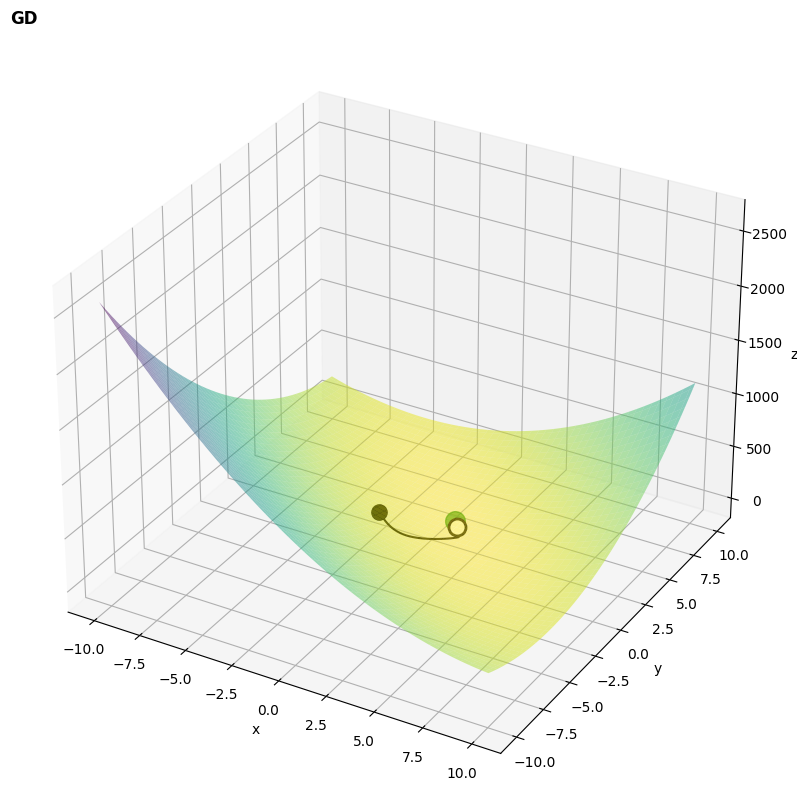

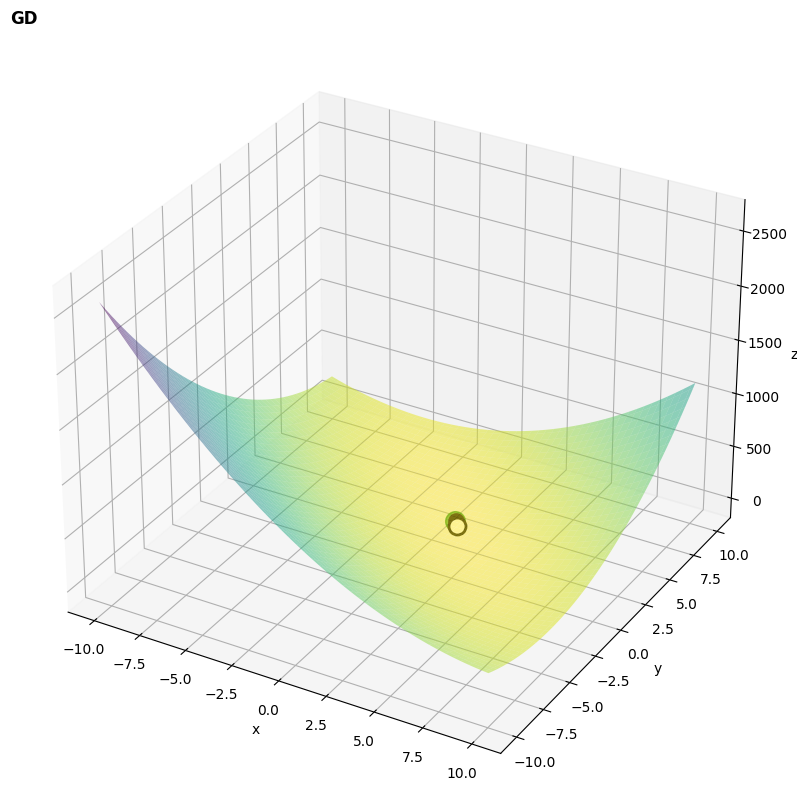

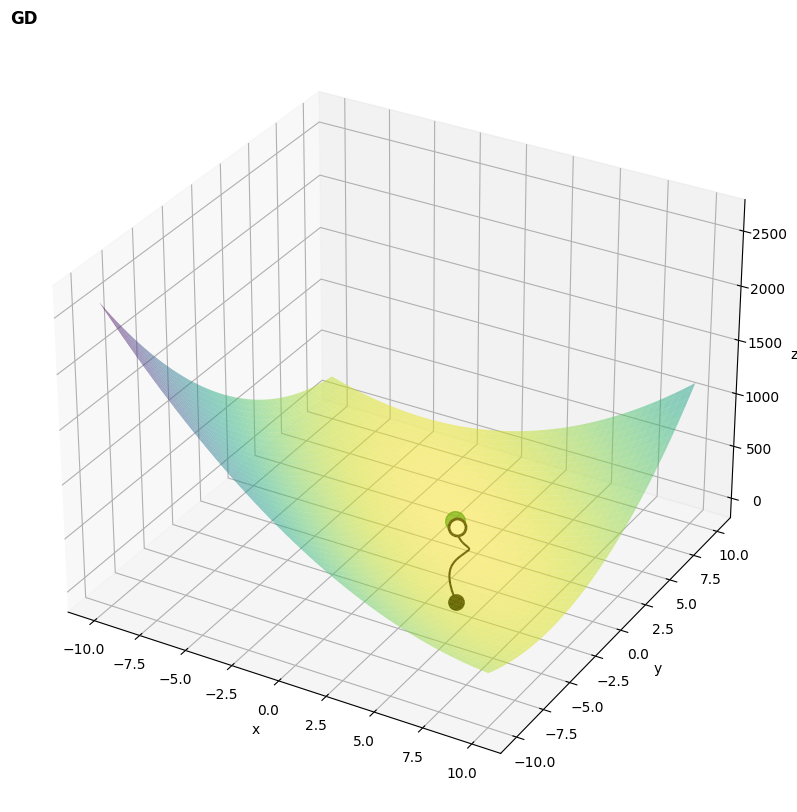

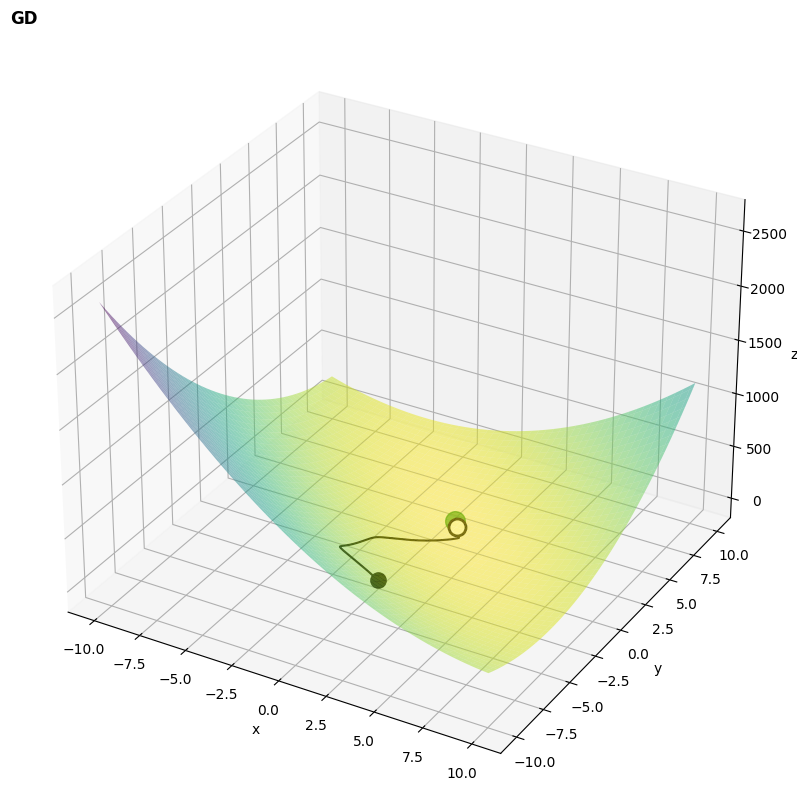

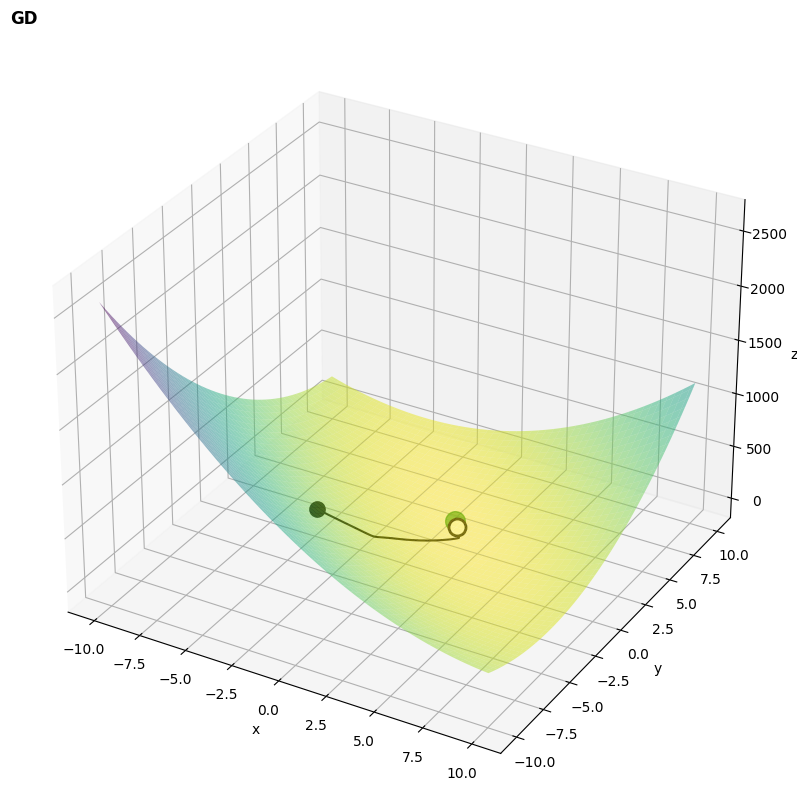

In [87]:
# Для Бута
initial_points = [[-2, 1], [1.05, 3], [5, -4], [2,-6], [-3,-3]]
for i in initial_points:
  start_time = datetime.now()
  path = GD(Byta, i, max_iter = 10000, lr = 0.001, delta=0.00001)
  print("Для функции Бута полученные значения\n", datetime.now() - start_time)
  draw_result(Byta, path, "GD")

Для функции Himmelblau полученные значения
 0:00:00.034534
Начальная точка:	[-1.00 1.00 130.00]
Найденный минимум:	[-2.81e+00 3.13e+00 3.20e-09]
Глобальный минимум:	[[0.00e+00 0.00e+00 0.00e+00]
 [3.00e+00 2.00e+00 0.00e+00]
 [-2.81e+00 3.13e+00 0.00e+00]
 [-3.78e+00 -3.28e+00 0.00e+00]
 [3.58e+00 -1.85e+00 0.00e+00]]
Погрешности до каждого минимума:	[-3.201517072533573e-09, -3.201517072533573e-09, -3.201517072533573e-09, -3.201517072533573e-09, -3.201517072533573e-09]
Кол-во итераций:	214
Для функции Himmelblau полученные значения
 0:00:00.032355
Начальная точка:	[1.05 3.00 56.88]
Найденный минимум:	[3.00e+00 2.00e+00 1.25e-09]
Глобальный минимум:	[[0.00e+00 0.00e+00 0.00e+00]
 [3.00e+00 2.00e+00 0.00e+00]
 [-2.81e+00 3.13e+00 0.00e+00]
 [-3.78e+00 -3.28e+00 0.00e+00]
 [3.58e+00 -1.85e+00 0.00e+00]]
Погрешности до каждого минимума:	[-1.250662924912838e-09, -1.250662924912838e-09, -1.250662924912838e-09, -1.250662924912838e-09, -1.250662924912838e-09]
Кол-во итераций:	466
Для функции H

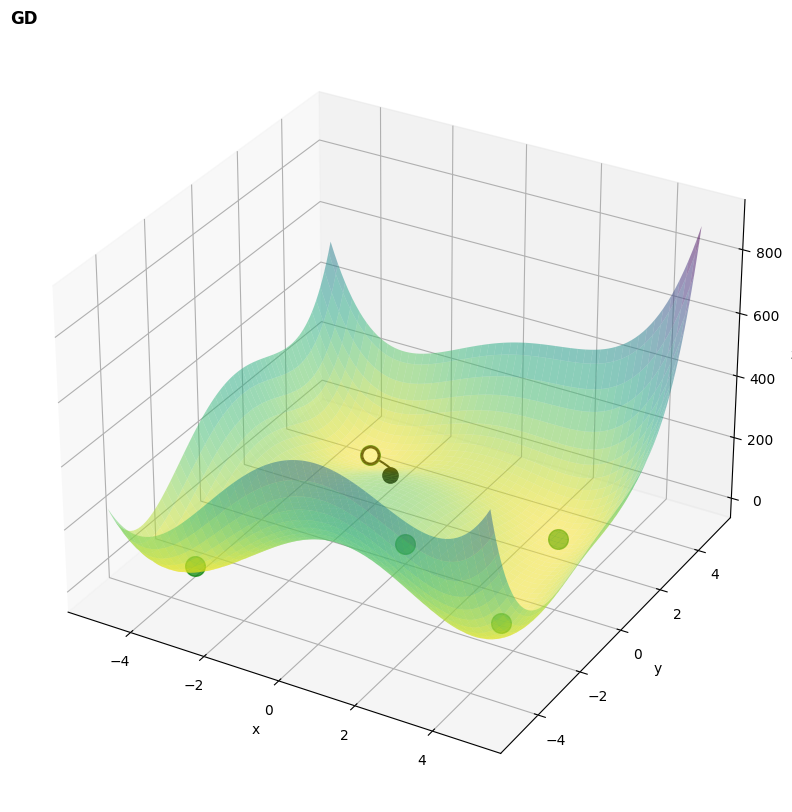

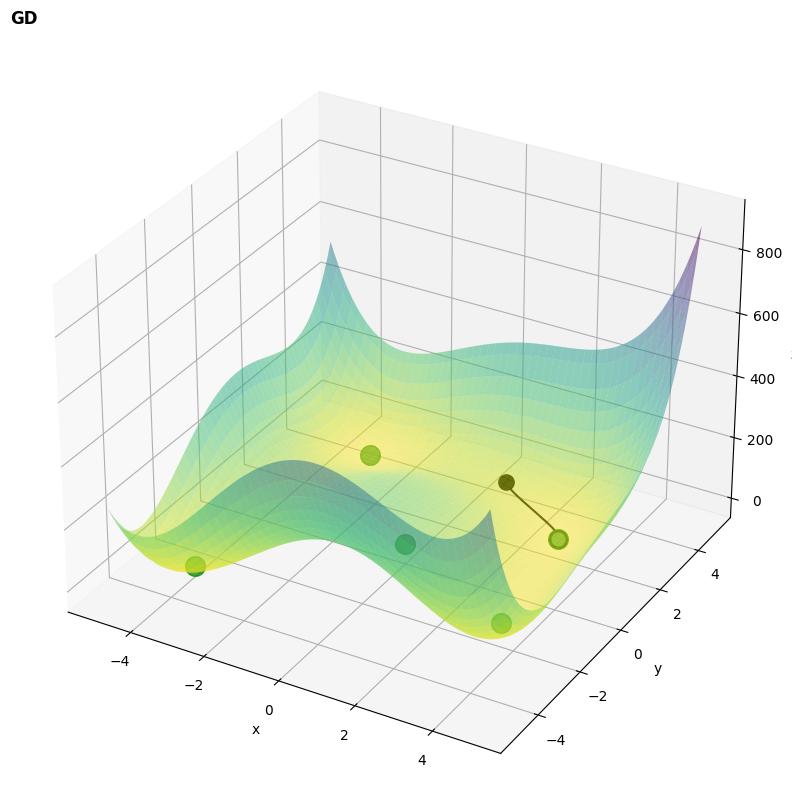

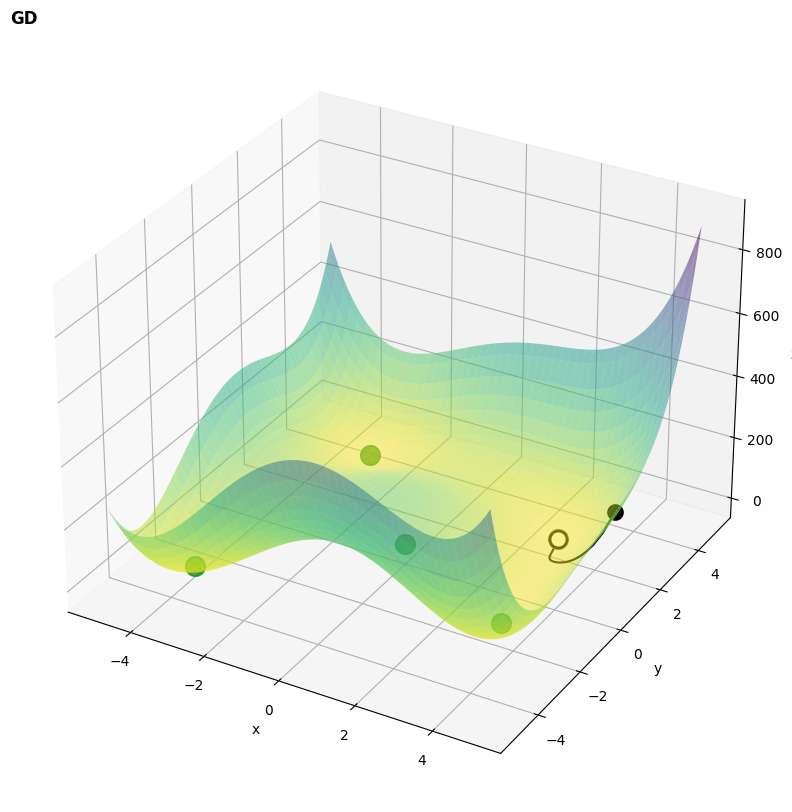

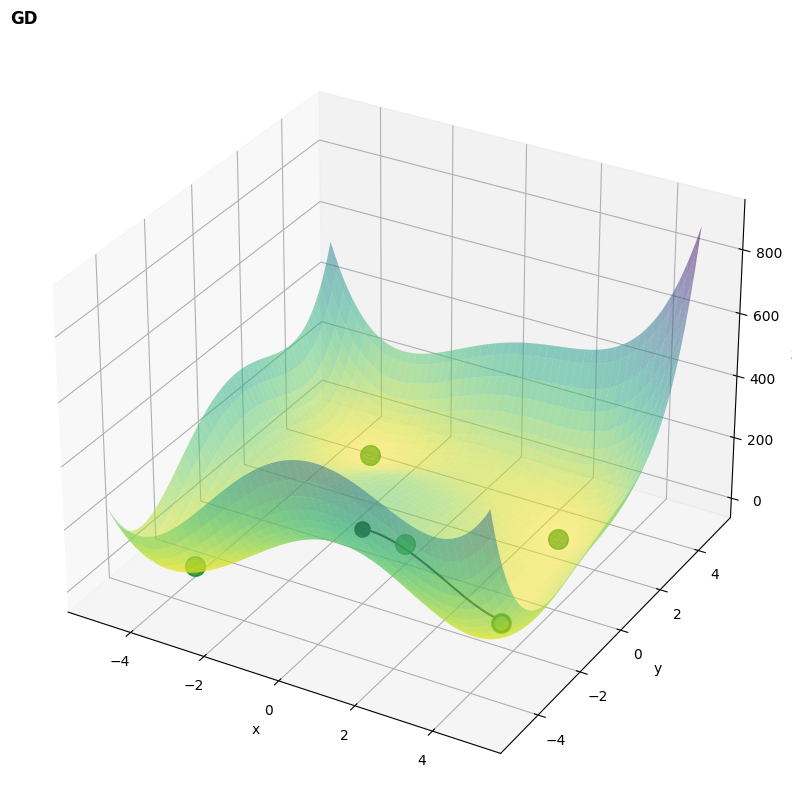

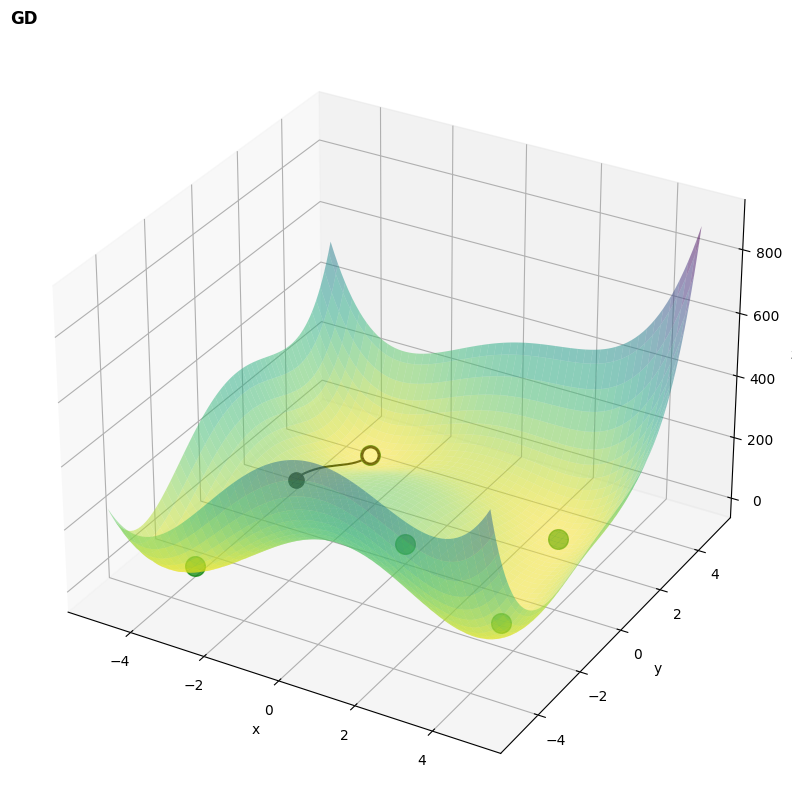

In [88]:
# Для Himmelblau
initial_points = [[-1, 1], [1.05, 3], [5, 1], [0,-2], [-3,0]]
for i in initial_points:
  start_time = datetime.now()
  path = GD(Himmelblau, i, max_iter = 10000, lr = 0.001, delta=0.00001)
  print("Для функции Himmelblau полученные значения\n", datetime.now() - start_time)
  draw_result(Himmelblau, path, "GD")

##Зд графики для "повертеть"

In [89]:
path_byta = GD(Byta, [-1, 1], max_iter=10000, lr=0.001, delta=0.00001)
draw_result_3d(Byta, path_byta, "GD")

In [90]:
path_himmelblau  = GD(Himmelblau, [-1, 1], max_iter=10000, lr=0.001, delta=0.00001)
draw_result_3d(Himmelblau, path_himmelblau, "GD")

##Моментная модификация GD
1.5 Запрограммировать одну моментную модификацию и протестировать ее

In [91]:
def momentum_GD(function_class, start_params, max_iter=1000, lr=0.1, delta=0.001, beta=0.5):
    """Градиентный спуск с моментной модификацией

    Args:
        function_class: объект класса с методами function, gradient, get_min
        start_params (np.ndarray): начальная точка
        max_iter (int, optional): ограничение по кол-ву итераций. Defaults to 1000.
        lr (float, optional): шаг обучения. Defaults to 0.1.
        delta (float, optional): радиус сходимости. Defaults to 0.001.
        beta (float, optional): Коэффициент энергичности. Defaults to 0.5.

    Returns:
        np.array: точки, по которым двигалась моментная модификация градиентного спуска
    """

    # начальная точка
    params_prev = start_params.copy()
    params = start_params.copy()
    # точки, по которым двигалась моментная модификация градиентного спуска
    path = [np.array([params[0], params[1], function_class.function(params)])]
    # итерация
    step = 0
    while (step < max_iter):

        current_position = np.array([params[0], params[1], function_class.function(params)])
        path.append(current_position)

        # Проверяем условия сходимости к каждому локальному минимуму
        minima = function_class.get_min()
        converged_to_minima = any(np.linalg.norm(current_position[:2] - min_point[:2]) < delta for min_point in minima)

        if converged_to_minima:
            break

        # вычисляем значение новых координаты исходя из значений
        # предыдущих и настоящих
        grads = function_class.gradient(params)
        params_new = params - lr * grads + beta * (params - params_prev)
        params_prev = params
        params = params_new

        step += 1

    return np.array(path)


Для функции Бута полученные значения
 0:00:01.013485
Начальная точка:	[7.00 -3.00 72.00]
Найденный минимум:	[1.31e+00 2.63e+00 2.53e-01]
Глобальный минимум:	[[1.00e+00 3.00e+00 0.00e+00]]
Погрешность:	-0.25287463690886836
Кол-во итераций:	10001


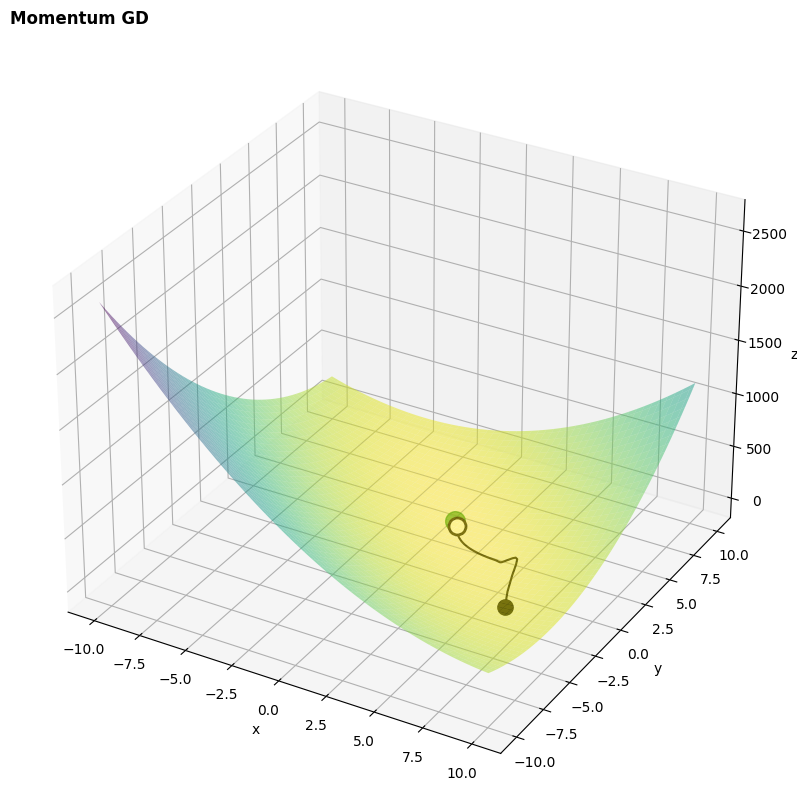

In [92]:
# Для Бута
start_time = datetime.now()
path = momentum_GD(Byta, np.array([7,-3]), max_iter = 10000, lr = 0.001, delta=0.00001)
print("Для функции Бута полученные значения\n", datetime.now() - start_time)
draw_result(Byta, path, "Momentum GD")

То же самое но с другой beta

Для функции Бута полученные значения
 0:00:00.852562
Начальная точка:	[7.00 -3.00 72.00]
Найденный минимум:	[1.32e+00 2.61e+00 2.80e-01]
Глобальный минимум:	[[1.00e+00 3.00e+00 0.00e+00]]
Погрешность:	-0.2796976801433342
Кол-во итераций:	10001


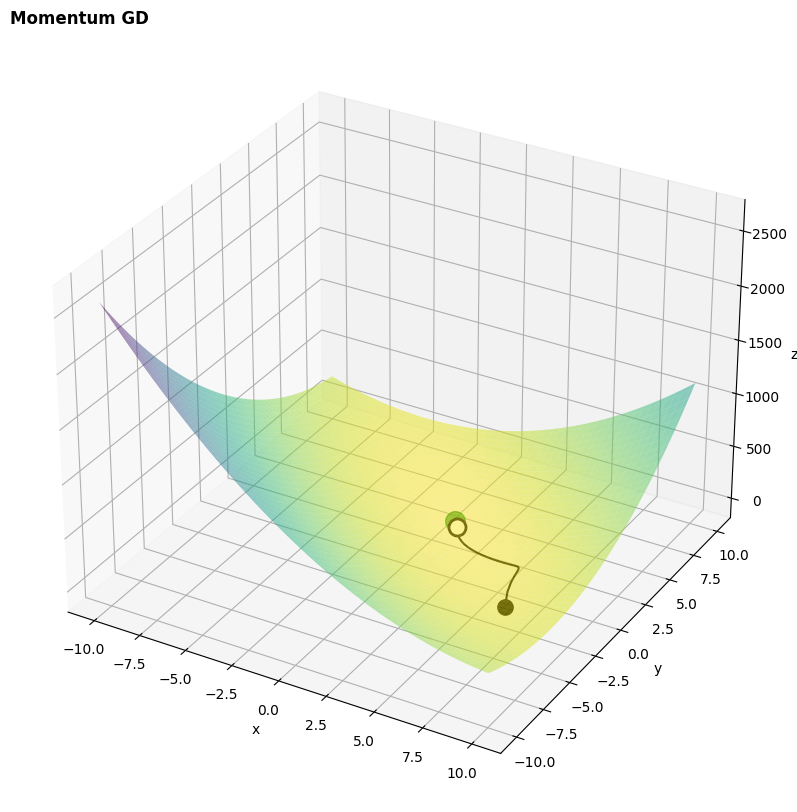

In [93]:
# Для Бута с другой beta
start_time = datetime.now()
path = momentum_GD(Byta, np.array([7,-3]), max_iter = 10000, lr = 0.001, delta=0.00001, beta = 0.1)
print("Для функции Бута полученные значения\n", datetime.now() - start_time)
draw_result(Byta, path, "Momentum GD")

Для функции Himmelblau полученные значения
 0:00:00.070284
Начальная точка:	[-1.00 1.00 130.00]
Найденный минимум:	[-2.81e+00 3.13e+00 3.94e-09]
Глобальный минимум:	[[0.00e+00 0.00e+00 0.00e+00]
 [3.00e+00 2.00e+00 0.00e+00]
 [-2.81e+00 3.13e+00 0.00e+00]
 [-3.78e+00 -3.28e+00 0.00e+00]
 [3.58e+00 -1.85e+00 0.00e+00]]
Погрешности до каждого минимума:	[-3.942646143936836e-09, -3.942646143936836e-09, -3.942646143936836e-09, -3.942646143936836e-09, -3.942646143936836e-09]
Кол-во итераций:	405


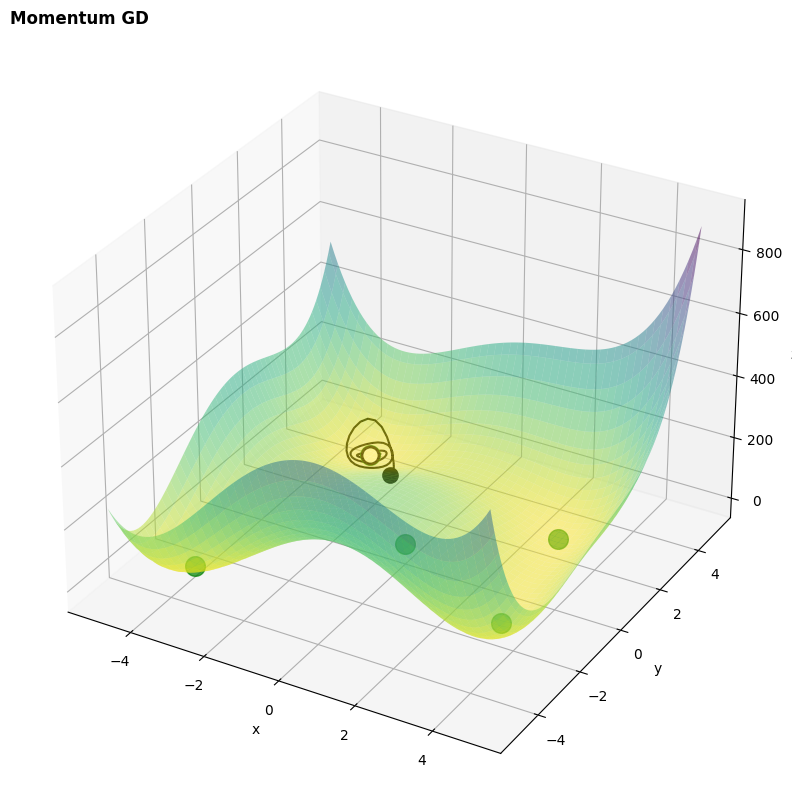

In [94]:
# Для Himmelblau
start_time = datetime.now()
path = momentum_GD(Himmelblau, np.array([-1,1]), max_iter = 10000, lr = 0.001, delta=0.00001,  beta = 0.95)
print("Для функции Himmelblau полученные значения\n", datetime.now() - start_time)
draw_result(Himmelblau, path, "Momentum GD")

При слишком больших beta путь начинает ощутимо "штормить"

##Адаптивный метод градиентного спуска, Adam
1.6 Запрограммировать одну адаптивную модификацию и протестировать ее

In [95]:
def Adam_GD(function_class, start_params, max_iter=1000, lr=0.1, b1=0.6, b2=0.999, e=10e-8, delta=0.001):
    """Адаптивный градиентный спуск: Adam

    Args:
        function_class: объект класса с методами function, gradient, get_min
        start_params (np.ndarray): начальная точка
        max_iter (int, optional): Ограничение по кол-ву итераций. Defaults to 1000.
        lr (float, optional): шаг обучения. Defaults to 0.1.
        b1 (float, optional): параметр beta1. Defaults to 0.9.
        b2 (float, optional): параметр beta2. Defaults to 0.999.
        e (float, optional): "бесконечно" малое число, чтобы не было деления на 0 случайно. Defaults to 10e-8.
        delta (float, optional): радиус сходимости. Defaults to 0.001.

    Returns:
        np.array: точки, по которым двигалась моментная модификация градиентного спуска
    """

    # начальная точка
    params = start_params.copy()
    # точки, по которым двигалась моментная модификация градиентного спуска
    path = [np.array([params[0], params[1], function_class.function(params)])]
    # инициализация моментов
    m = np.zeros_like(params)
    v = np.zeros_like(params)
    # итерация
    step = 0
    while (step < max_iter):

        current_position = np.array([params[0], params[1], function_class.function(params)])
        path.append(current_position)

        # Проверяем условия сходимости к глобальному минимуму
        minima = function_class.get_min()
        distances = [np.linalg.norm(current_position[:2] - min_point[:2]) for min_point in minima]
        min_distance = min(distances)

        if min_distance < delta:
            break

        # считаем моменты
        grads = function_class.gradient(params)
        m = b1 * m + (1 - b1) * grads
        v = b2 * v + (1 - b2) * grads ** 2
        # новое значение параметров
        params = params - lr * m / (np.sqrt(v) + e)

        step += 1

    return np.array(path)


Тестирование:

Для функции Бута полученные значения
 0:00:00.920416
Начальная точка:	[5.00 5.00 164.00]
Найденный минимум:	[1.31e+00 2.63e+00 2.51e-01]
Глобальный минимум:	[[1.00e+00 3.00e+00 0.00e+00]]
Погрешность:	-0.2511591551953457
Кол-во итераций:	10001


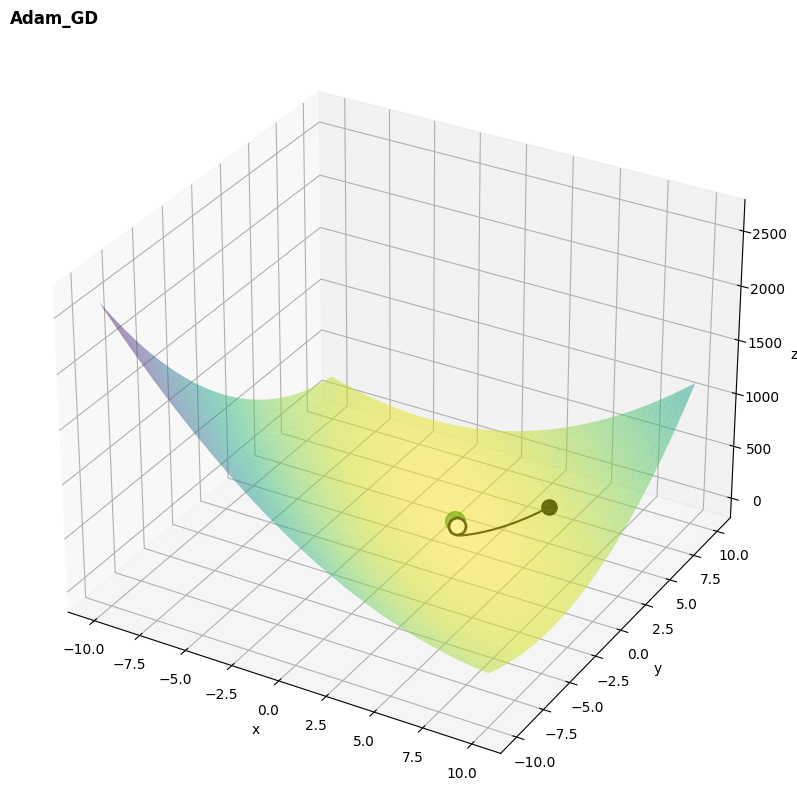

In [96]:
# Для Бута
start_time = datetime.now()
path = Adam_GD(Byta, np.array([5,5]), max_iter = 10000, lr = 0.01)
print("Для функции Бута полученные значения\n", datetime.now() - start_time)
draw_result(Byta, path, "Adam_GD")

Для Бута нет ощутимого улучшения, я так поняла это связано со спецификой самой функции.

Для функции Himmelblau полученные значения
 0:00:00.002625
Начальная точка:	[-2.00 4.00 58.00]
Найденный минимум:	[-2.81e+00 3.13e+00 2.82e-05]
Глобальный минимум:	[[0.00e+00 0.00e+00 0.00e+00]
 [3.00e+00 2.00e+00 0.00e+00]
 [-2.81e+00 3.13e+00 0.00e+00]
 [-3.78e+00 -3.28e+00 0.00e+00]
 [3.58e+00 -1.85e+00 0.00e+00]]
Погрешности до каждого минимума:	[-2.8236332890734504e-05, -2.8236332890734504e-05, -2.8236332890734504e-05, -2.8236332890734504e-05, -2.8236332890734504e-05]
Кол-во итераций:	28


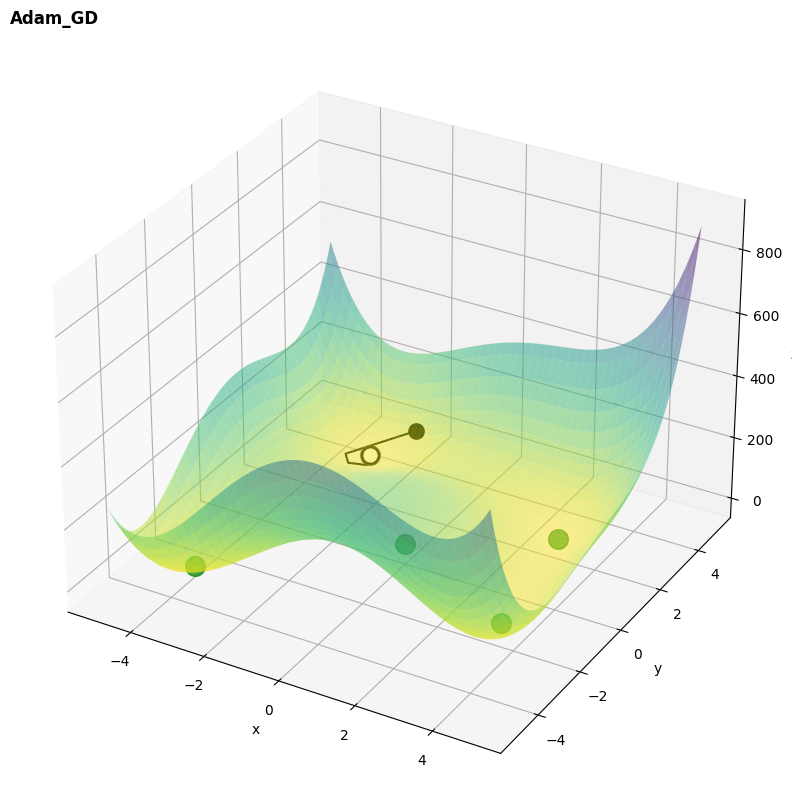

In [97]:
# Для Himmelblau
start_time = datetime.now()
path = Adam_GD(Himmelblau, np.array([-2,4]), max_iter=10000, lr=0.1)
print("Для функции Himmelblau полученные значения\n", datetime.now() - start_time)
draw_result(Himmelblau, path, "Adam_GD")

Для Химмельблау есть ощутимое уменьшение количества итераций

# Теперь поиск глобального минимума для кастомной функции.

1.4 Запрограммировать метод вычисления градиента

Функция задается форматом: x * y + x**2

Класс для кастомной фунции

In [98]:
class CustomFunction():
    def __init__(self, expression):
        self.expression = expression
        self.variables = symbols('x y')

    def function(self, xy):
        x, y = xy[0], xy[1]
        substitutions = {self.variables[0]: x, self.variables[1]: y}
        return float(self.expression.subs(substitutions))

    def get_bounds(self):
        return np.array([[-10, -10], [10, 10]])

    def get_min(self):
        return np.array([[0., 0., 0.]])

    def gradient(self, xy): # Символьное вычисление градиента функции (на доп балл)
        substitutions = {self.variables[0]: xy[0], self.variables[1]: xy[1]}
        diffX = diff(self.expression, self.variables[0])
        diffY = diff(self.expression, self.variables[1])
        return np.array([float(diffX.subs(substitutions)), float(diffY.subs(substitutions))])

    def gradient_num(self, xy, epsilon=1e-10): # Численная аппроксимация градиента функции (на доп балл)
          df_dx = (function(xy[0] + epsilon, xy[1]) - function(xy[0] - epsilon, xy[1])) / (2 * epsilon)
          df_dy = (function(xy[0], xy[1] + epsilon) - function(xy[0], xy[1] - epsilon)) / (2 * epsilon)
          return df_dx, df_dy


In [99]:
def draw_result_func(function_class: CustomFunction, path: np.array) -> None:
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    bounds = function_class.get_bounds()

    x = np.linspace(bounds[0, 0], bounds[1, 0], 100)
    y = np.linspace(bounds[0, 1], bounds[1, 1], 100)
    x_grid, y_grid = np.meshgrid(x, y)

    z = []
    for i in range(len(x)):
        for j in range(len(y)):
            z.append(function_class.function(np.array([x[i], y[j]])))

    z_grid = np.asarray(np.meshgrid(z))
    z_grid = z_grid.reshape(x_grid.shape)

    ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis_r', alpha=0.5)
    ax.plot(path[:, 0], path[:, 1], path[:, 2], '-', c='black', alpha=1)
    ax.scatter3D(path[0, 0], path[0, 1], path[0, 2], s=100, c="black", lw=2, ec='black', marker='o')
    ax.scatter3D(path[-1, 0], path[-1, 1], path[-1, 2], s=150, c="white", lw=2, ec='black', marker='o', alpha=1)



In [100]:
expression = input("Введите выражение, переменные задавайте в виде x, y: ")
simplified_expression = sympify(expression)

# Создаем объект класса CustomFunction
custom_function = CustomFunction(simplified_expression)

# Пример использования
point = [0.0, 0.0]
print("Значение функции в точке {}: {}".format(point, custom_function.function(point)))
print("Градиент в точке {}: {}".format(point, custom_function.gradient(point)))
print("Границы области определения: {}".format(custom_function.get_bounds()))
print("Точки минимума: {}".format(custom_function.get_min()))

Введите выражение, переменные задавайте в виде x, y: (x + y)**2
Значение функции в точке [0.0, 0.0]: 0.0
Градиент в точке [0.0, 0.0]: [0.00e+00 0.00e+00]
Границы области определения: [[-10 -10]
 [ 10  10]]
Точки минимума: [[0.00e+00 0.00e+00 0.00e+00]]


Для функции пользователя полученные значения
 0:00:02.802262


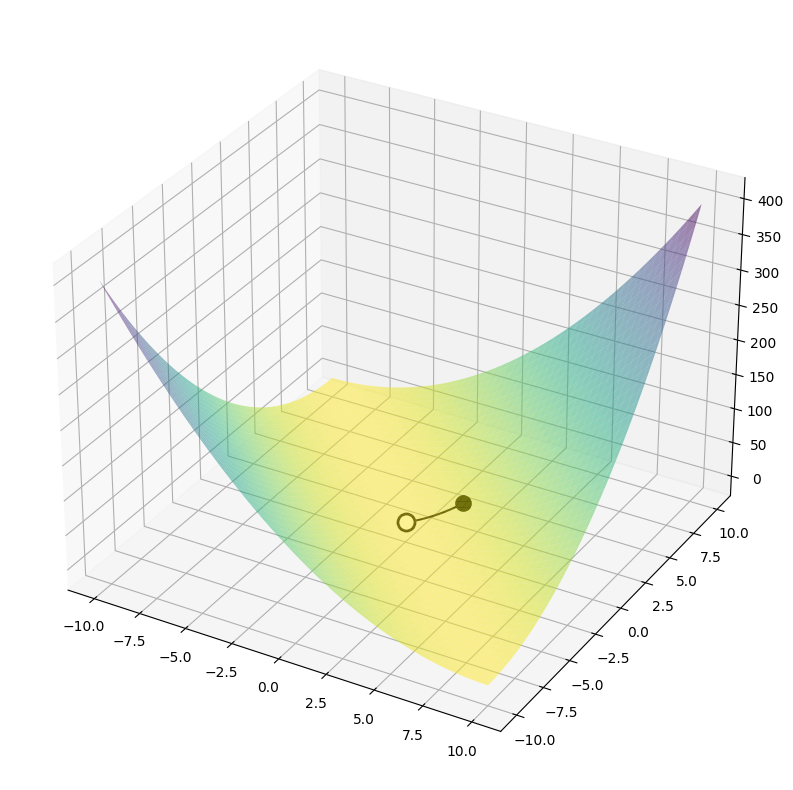

In [101]:
# GD для Custom Function
start_time = datetime.now()
path1 = GD(custom_function, np.array([2., 2.]), max_iter = 1000, lr = 0.001, delta=0.00001)
print("Для функции пользователя полученные значения\n", datetime.now() - start_time)
draw_result_func(custom_function, path1)

##Метод эволюции темпа

Запрограммировать метод эволюции темпа обучения

In [102]:
def GD_LR(function_class, start_point, lr = 0.01, max_iter = 1000, tolerance = 1e-6, improvement_threshold = 0.1):

    function = function_class.function
    grad_function = function_class.gradient


    path = [np.array([start_point[0], start_point[1], function_class.function(start_point)])]
    x, y = start_point
    lr = lr
    best_value = float('inf')

    for _ in range(max_iter):
        grad = grad_function(np.array([x, y]))
        new_x, new_y = np.array([x, y]) - lr * grad
        new_value = function(np.array([new_x, new_y]))

        if new_value < best_value - tolerance * improvement_threshold:
            best_value = new_value
        else:
            lr /= 2

        path.append(np.array([new_x, new_y, function_class.function(np.array([new_x, new_y]))]))
        if np.linalg.norm([new_x - x, new_y - y]) < tolerance:
            break

        x, y = new_x, new_y

    return np.array(path)

Для функции Himmelblau полученные значения
 0:00:00.000967
Начальная точка:	[-2.00 2.00 50.00]
Найденный минимум:	[-2.81e+00 3.13e+00 1.45e-09]
Глобальный минимум:	[[0.00e+00 0.00e+00 0.00e+00]
 [3.00e+00 2.00e+00 0.00e+00]
 [-2.81e+00 3.13e+00 0.00e+00]
 [-3.78e+00 -3.28e+00 0.00e+00]
 [3.58e+00 -1.85e+00 0.00e+00]]
Погрешности до каждого минимума:	[-1.4545412277063065e-09, -1.4545412277063065e-09, -1.4545412277063065e-09, -1.4545412277063065e-09, -1.4545412277063065e-09]
Кол-во итераций:	16


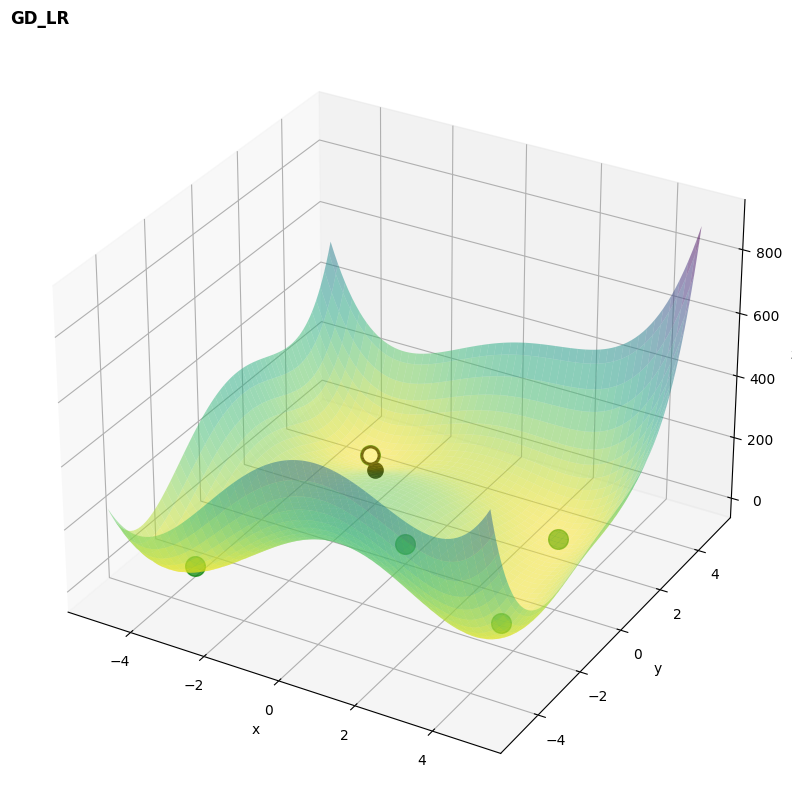

In [103]:
start_time = datetime.now()
path = GD_LR(Himmelblau, np.array([-2, 2]), max_iter=1000)
print("Для функции Himmelblau полученные значения\n", datetime.now() - start_time)
draw_result(Himmelblau, path, "GD_LR")

Для функции Byta полученные значения
 0:00:00.046382
Начальная точка:	[1.00 1.00 20.00]
Найденный минимум:	[1.33e+00 2.60e+00 2.83e-01]
Глобальный минимум:	[[1.00e+00 3.00e+00 0.00e+00]]
Погрешность:	-0.2827125603995744
Кол-во итераций:	1001


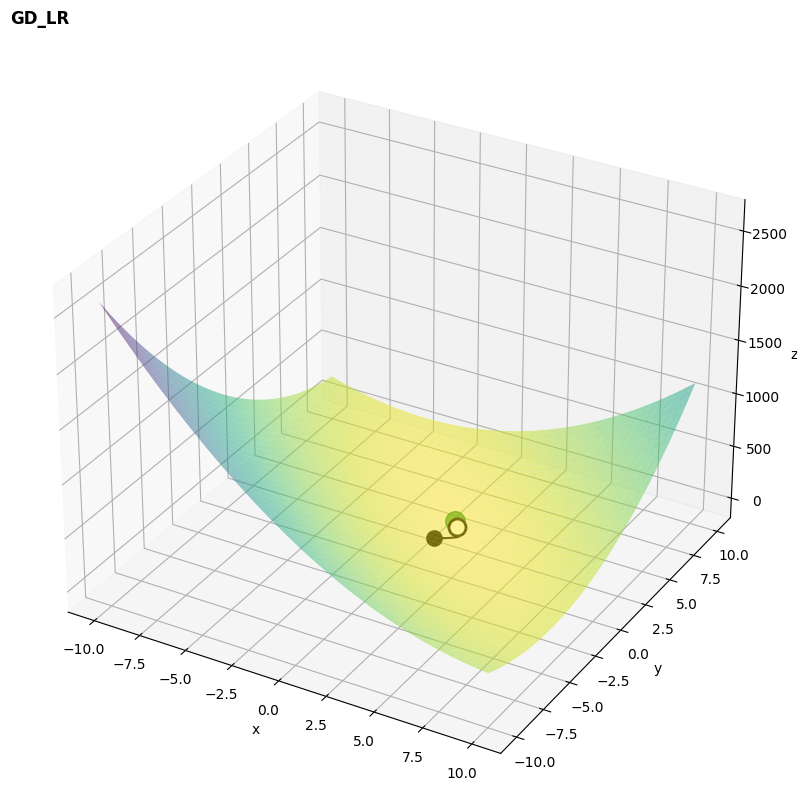

In [ ]:
start_time = datetime.now()
path = GD_LR(Byta, np.array([1, 1]), max_iter=1000)
print("Для функции Byta полученные значения\n", datetime.now() - start_time)
draw_result(Byta, path, "GD_LR")